Loops 410
Processed data sizes [220]
Processed batch sizes [ True]

[BEST] # 0
score AUROC LAT (VAL)0.8661157024793388
score AUROC REC (VAL0.856198347107438
score AUROC LAT (TRAIN)0.8814049586776859
score AUROC REC (TRAIN)0.868595041322314
train_samples              220
lognormal                    1
hidden                      10
latent                      12
with_r                       0
with_recon                   1
with_non_gauss               0
with_assym                   1

[BEST] # 1
score AUROC LAT (VAL)0.8661157024793388
score AUROC REC (VAL0.856198347107438
score AUROC LAT (TRAIN)0.8814049586776859
score AUROC REC (TRAIN)0.868595041322314
train_samples              220
lognormal                    1
hidden                      15
latent                      16
with_r                       0
with_recon                   1
with_non_gauss               0
with_assym                   0

[BEST] # 2
score AUROC LAT (VAL)0.8661157024793388
score AUROC REC (VAL0.856198347107438
s

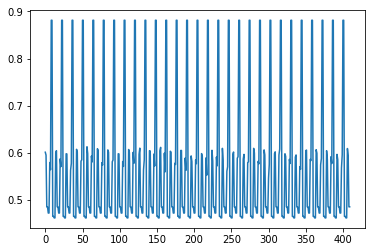

In [32]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
def save_obj(obj, name ):
    with open('local/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('local/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
data = load_obj("state.pkl")
d = [item[0] for item in data]
batch_size = [item[1] for item in data]
hidden = [item[2] for item in data] 
latent = [item[3] for item in data] 
with_r = [item[4] for item in data]
with_recon = [item[5] for item in data] 
with_non_gauss = [item[6] for item in data] 
with_assym = [item[7] for item in data] 
noise_u_t = [item[8] for item in data] 
noise_w_t = [item[9] for item in data] 
val_t = [item[10] for item in data] 
novel_t = [item[11] for item in data] 
score = [item[12] for item in data]
print("Loops", len(d))
print("Processed data sizes", np.unique(d))
print("Processed batch sizes",np.unique(batch_size))
for i in range(5):
    print("\n[BEST] #", i)
    score_temp = [s["AUROC LAT (TRAIN)"] for s in score]
    idx = np.argsort(score_temp)[-(i+1)]
    print("{0:20}{1:10}".format("score AUROC LAT (VAL)", score[idx]["AUROC LAT (VAL)"]))
    print("{0:20}{1:10}".format("score AUROC REC (VAL", score[idx]["AUROC REC (VAL)"]))
    print("{0:20}{1:10}".format("score AUROC LAT (TRAIN)", score[idx]["AUROC LAT (TRAIN)"]))
    print("{0:20}{1:10}".format("score AUROC REC (TRAIN)", score[idx]["AUROC REC (TRAIN)"]))   
    print("{0:20}{1:10}".format("train_samples", d[idx]))
    print("{0:20}{1:10}".format("lognormal", batch_size[idx]))
    print("{0:20}{1:10}".format("hidden", hidden[idx]))
    print("{0:20}{1:10}".format("latent", latent[idx]))
    print("{0:20}{1:10}".format("with_r", with_r[idx]))
    print("{0:20}{1:10}".format("with_recon", with_recon[idx]))
    print("{0:20}{1:10}".format("with_non_gauss", with_non_gauss[idx]))
    print("{0:20}{1:10}".format("with_assym", with_assym[idx]))
plt.plot(range(len(score_temp)), score_temp)


[BEST] # 0


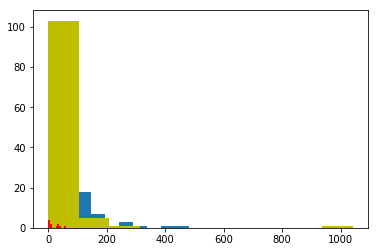


[BEST] # 1


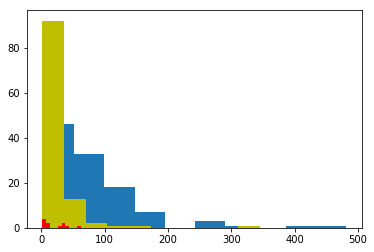


[BEST] # 2


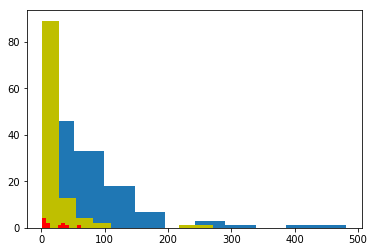


[BEST] # 3


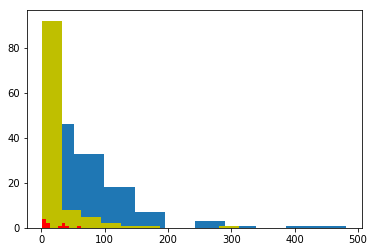


[BEST] # 4


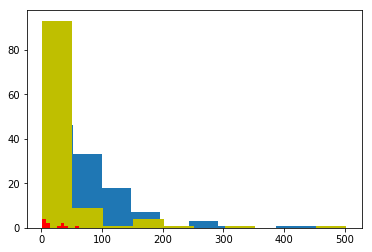

In [18]:
for i in range(5):
    print("\n[BEST] #", i)
    score_temp = [s["AUROC LAT (TRAIN)"] for s in score]
    idx = np.argsort(score_temp)[-(i+1)]
    plt.hist(np.sum(noise_u_t[idx]**2, 1), color="g", log=False)
    plt.hist(np.sum(val_t[idx]**2, 1), log=False)
    plt.hist(np.sum(noise_w_t[idx]**2, 1), color="y", log=False)
    plt.hist(np.sum(novel_t[idx]**2, 1), color="r", log=False)
    plt.show()



[BEST] # 0


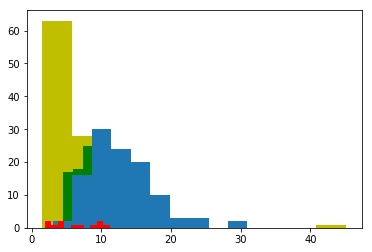


[BEST] # 1


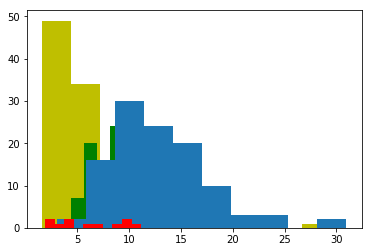


[BEST] # 2


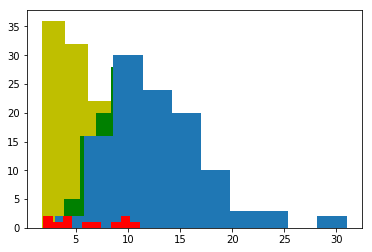


[BEST] # 3


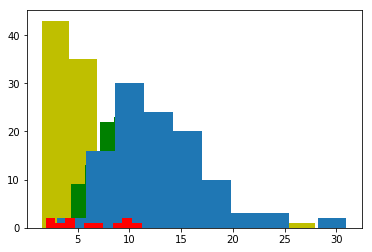


[BEST] # 4


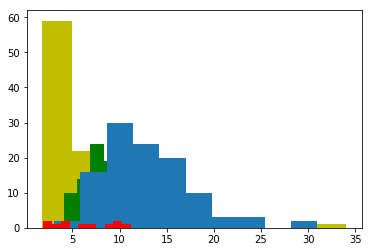

In [19]:
for i in range(5):
    print("\n[BEST] #", i)
    score_temp = [s["AUROC LAT (TRAIN)"] for s in score]
    idx = np.argsort(score_temp)[-(i+1)]
    plt.hist(np.sum(noise_w_t[idx], 1), color="y")
    plt.hist(np.sum(noise_u_t[idx], 1), color="g")
    plt.hist(np.sum(val_t[idx], 1))
    plt.hist(np.sum(novel_t[idx], 1), color="r")
    plt.show()

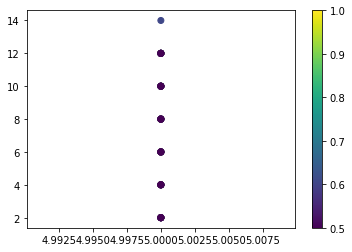

In [21]:
score_temp = [s["AUROC LAT (TRAIN)"] for s in score]
plt.scatter(hidden, latent ,c=score_temp, vmin=0.5, vmax=1)
plt.colorbar()

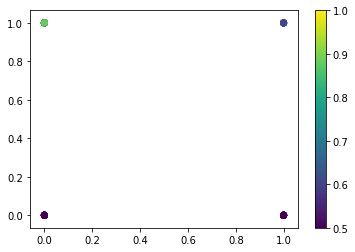

In [23]:
plt.scatter(with_r, with_recon ,c=score_temp, vmin=0.5, vmax=1)
plt.colorbar()

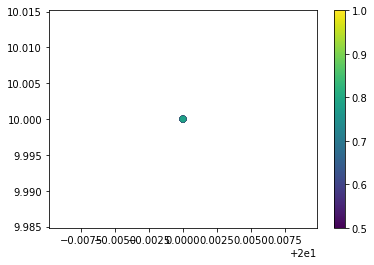

In [291]:
plt.scatter(batch_size, hidden ,c=score_temp, vmin=0.5, vmax=1)
plt.colorbar()

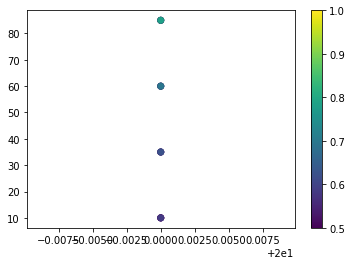

In [292]:
plt.scatter(batch_size, latent ,c=score_temp, vmin=0.5, vmax=1)
plt.colorbar()

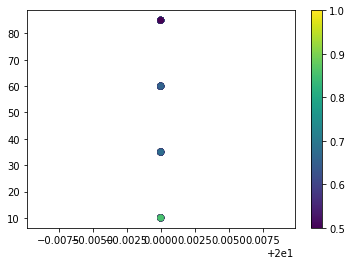

In [322]:
plt.scatter(batch_size, hidden ,c=score_temp, vmin=0.5, vmax=1)
plt.colorbar()

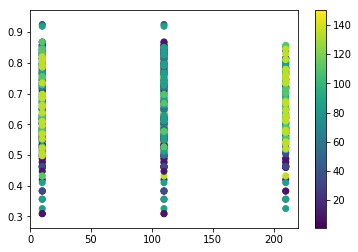

In [211]:
plt.scatter(batch_size, score_temp ,c=hidden, vmin=1, vmax=150)
plt.colorbar()

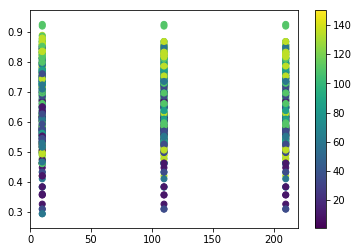

In [260]:
plt.scatter(batch_size, score_temp ,c=latent, vmin=1, vmax=150)
plt.colorbar()

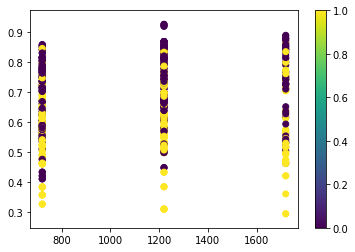

In [261]:
plt.scatter(d, score_temp ,c=with_recon, vmin=0, vmax=1)
plt.colorbar()

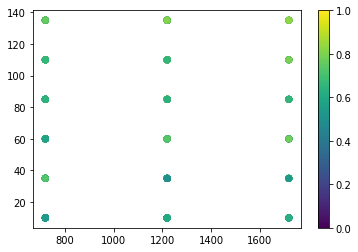

In [266]:
plt.scatter(d, latent ,c=score_temp, vmin=0, vmax=1)
plt.colorbar()

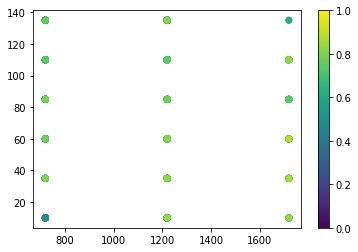

In [267]:
plt.scatter(d, hidden ,c=score_temp, vmin=0, vmax=1)
plt.colorbar()

(array([12., 12.,  0.,  0., 12.,  0.,  0.,  0.,  0., 12.]),
 array([0.46115702, 0.4635124 , 0.46586777, 0.46822314, 0.47057851,
        0.47293388, 0.47528926, 0.47764463, 0.48      , 0.48235537,
        0.48471074]),
 <a list of 10 Patch objects>)

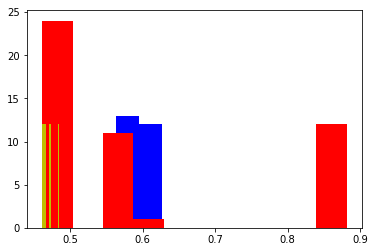

In [24]:
plt.hist(np.asarray(score_temp)[with_r], color="g")
plt.hist(np.asarray(score_temp)[with_recon], color="b")
plt.hist(np.asarray(score_temp)[np.asarray(with_r) == False], color="r")
plt.hist(np.asarray(score_temp)[np.asarray(with_recon) == False], color="y")